<a href="https://colab.research.google.com/github/CookiesAndWater/MAT_422/blob/main/MAT422_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4 Maximum Likeihood Estimation

## 2.4.1 MLE for Random Samples

* **Maximum Likehood Estimation**: MLE is a method of estimating the parameters of a probability distribution through a likehood function.
  * The **Maximum Likehood Estimate** is the point in the parameter space that maximizes the likehood function.
  
  * Let $X_{1}, X_{2},... X_{n}$ have joint pmf or pfd,
    * $f(x_1,x_2,...x_n;θ_1,...θ_m)$,
        * where θ have unknowns values and x have observed sample values. This is the **Maximim Likelihhod Function**.
  * Let $X_1...X_n$ be a random sample from a normal distribution
    * $f(x_1,...x_n;μ,σ^2) = (\frac{1}{2πσ^2})^{n/2} e^{-∑(x_i - μ)^2/2σ^2}$
  * Natural loging both side helps simplify
    * $ln(f(x_1,...x_n;μ,σ^2)) = -\frac{n}{2}ln(2πσ^2) - \frac{1}{2σ^2}∑(x_i - μ)^2$
  * We then take partial derivatives with respect to $μ$ and $σ^2$ and equating them to zero.
    * First μ
    * $\frac{∂[ln(f(x_1,...x_n;μ,σ^2))]}{∂μ} = -\frac{1}{σ^2} ∑(x_i - μ)^2$
    * $\hat{μ} = \frac{1}{n} ∑x_i$
    * Now σ^2
    * $\frac{∂[ln(f(x_1,...x_n;μ,σ^2))]}{∂σ^2} = -\frac{n}{σ^2} + \frac{1}{2σ^4}∑(x_i - μ)^2$
    * $σ^2 = \frac{∑ x_i - μ}{n}$

## 2.4.1 Linear Regression

* **Linear Regression**: The goal of linear regression is to find coefficients ($β$) that minimize the squared differences between the observed values of $y$ and the predicted values of ($\hat{y}$), in the form:
  * $∑^{n}_{i=1}(y_{i} - \hat{y})^2$, where
    * $\hat{y}$ = $β_0 + β_1 x_1 + β_n x_n$
* In linear regression, we can say that $y_i$ is made from a linear combination of the independent variable x plus some random error, which can be expressed as
  * $y_i = \hat{y}_i + ϵ$, where $ϵ$ ~ $N(0,σ^2)$
    * So $y_i$ is a normal variable with mean as a linear function x and a fixed standard deviation, so $y_i$ ~ $N(\hat{y}_i, σ^2)$
    * This means for each $y_i$, we can choose $μ$ in the normal distribution so $μ_i = \hat{y}_i$
* The likelihood function $𝓹(μ|y)$ explains the probablity of observing y given that the data is made by a normal distribution with mean $μ$ and varience $σ^2$
  * For n independent observations, the chance of observing all points $y_1...y_n$ can be described by
    * $𝓹(μ|y) = Π^n_{i=1}P_Y (y_i| μ, σ^2)$
  * The pdf of a normal distribution is given by
    * $P_Y (y_i| μ, σ^2) = \frac{1}{σ \sqrt{2π}}e^{-\frac{(y_i - μ)^2}{2σ^2}}$
  * We can combine the equations above and rewrite it as
    * $𝓹(μ|y) = Π^n_{i=1}(\frac{1}{σ \sqrt{2π}}e^{-\frac{(y_i - μ)^2}{2σ^2}})$
  * Since it's easier to maximize the log of the likelihood function, we log both sides (the process converts products into sums).
    * log($\hat{β}) = $ arg max $log(𝓹(μ|y)) = ∑^n_{i=1}(\frac{1}{σ \sqrt{2π}}) + log(e^{-\frac{(y_i - μ)^2}{2σ^2}})$
  * We then simplify the equation more
    * $ = $ arg max $∑^n_{i=1} log(e^{-\frac{(y_i - μ)^2}{2σ^2}})$
    * $ = $  arg max $∑^n_{i=1} -\frac{(y_i - μ)}{2σ^2}$
    * $ = $  arg min $∑^n_{i=1} (y_i - μ)^2$
  * Previously since we said we can choose $μ_i = \hat{y}$ for each y, then
    * $ = $  arg min $∑^n_{i=1} (y_i - \hat{y}_i)^2$

Estimated parameters:


 Estimated beta1: 1.6290576813007178

 Estimated beta0: 3.724136072435966

 Estimated sigma: 0.53886030984659


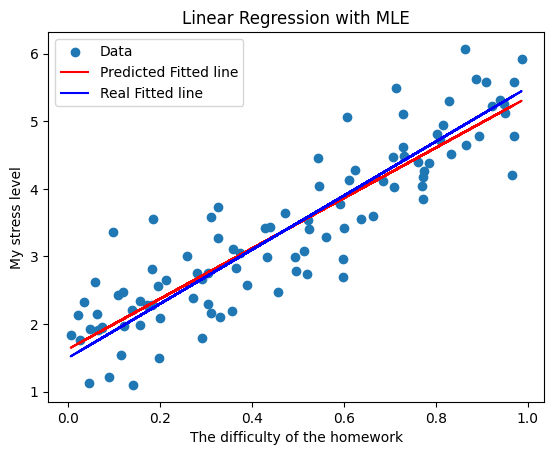

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


#Generate data
np.random.seed(42)
n = 100
x = np.random.rand(n,1)

real_beta0 = 1.5
real_beta1 = 4.0
real_sigma = 0.6

#Using the equation explained above
y = real_beta0 + real_beta1 * x.flatten() + np.random.normal(0, real_sigma, n)

#Using the equation explained above
def log_likelihood(parameters, x, y):
    beta0, beta1, sigma = parameters
    n = len(y)

    yhat = beta0 + beta1 * x.flatten()

    loglike = -n/2 * np.log(2 * np.pi * sigma**2) - np.sum((y-yhat)**2) / (2 *sigma**2)
    return -loglike

init_guess = [0, 0, 1]

answer = minimize(log_likelihood, init_guess, args = (x,y))

beta0_hat, beta1_hat, sigma_hat = answer.x

print("Estimated parameters:\n")
print("\n Estimated beta1:", beta0_hat)
print("\n Estimated beta0:", beta1_hat)
print("\n Estimated sigma:", sigma_hat)

plt.scatter(x,y, label = 'Data')
plt.plot(X, beta0_hat + beta1_hat * x, color = 'red', label = 'Predicted Fitted line')
plt.plot(X, real_beta0 + real_beta1 * x, color = 'blue', label = 'Real Fitted line')
plt.xlabel('The difficulty of the homework')
plt.ylabel('My stress level')
plt.title('Linear Regression with MLE')
plt.legend()
plt.show()


The above graph is generated using linear regression with MLE. We first generate a random seed(Then answer to life and everything). Then we get a random data set. We then choose values for beta1, beta2, and sigma.
* Next, we make the for $y_i$, where $y_i = \hat{y}_i + ϵ$, where $ϵ$ ~ $N(0,σ^2)$.
* We then define a function, log_likelihood, which computes the equation, which was in the explanation above:
  * $∑^n_{i=1}((\frac{1}{σ \sqrt{2π}}) - {\frac{(y_i - μ)^2}{2σ^2}})$
    * $ log(e^-{\frac{(y_i - μ)^2}{2σ^2}}) = {\frac{(y_i - μ)^2}{2σ^2}}$

We then return the negative of the equation, since in the equation it was originally arg max and returning the negative version of the equation gives us the arg min. We then use Scipy's minimize function, which takes care of minimizing the function for us.

We can also see that the predicted and real beta0, beta1, and sigma are all pretty similiar and so is the real and prediction line.

While the data is random, the data can be applied to real life applications, and in this case my stress level and homework difficulty.